In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches


In [50]:
cause_death = pd.read_csv('cause_of_deaths.csv')
cause_death.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [51]:
cause_death.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [52]:
len(cause_death['Country/Territory'].unique())

204

In [53]:
#can we group by continent first? 
countries_continents = pd.read_csv('countries_continents.csv')

del countries_continents['Unnamed: 0']
countries_continents

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina
...,...,...
190,South America,Peru
191,South America,Suriname
192,South America,Uruguay
193,South America,Venezuela


In [54]:
#merge the two df

cause_death = pd.merge(cause_death, countries_continents, how = 'left', left_on=['Country/Territory'], right_on=['Country'])
cause_death

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent,Country
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,338,2054,4154,5945,2673,5005,323,2985,Asia,Afghanistan
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,351,2119,4472,6050,2728,5120,332,3092,Asia,Afghanistan
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,386,2404,5106,6223,2830,5335,360,3325,Asia,Afghanistan
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,425,2797,5681,6445,2943,5568,396,3601,Asia,Afghanistan
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,451,3038,6001,6664,3027,5739,420,3816,Asia,Afghanistan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,381,2990,2373,2751,1956,4202,632,146,Africa,Zimbabwe
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,393,3027,2436,2788,1962,4264,648,146,Africa,Zimbabwe
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,398,2962,2473,2818,2007,4342,654,144,Africa,Zimbabwe
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,400,2890,2509,2849,2030,4377,657,139,Africa,Zimbabwe


In [55]:
#how to plot each line as a disease worldwide? 
# plt.plot(afg['Year'], afg['Cardiovascular Diseases'])

columns = cause_death.columns.tolist()
del columns[-4:]
del columns[:3]


cause_death.groupby(['Year', 'Meningitis',
 "Alzheimer's Disease and Other Dementias",
 "Parkinson's Disease",
 'Nutritional Deficiencies',
 'Malaria',
 'Drowning',
 'Interpersonal Violence',
 'Maternal Disorders',
 'HIV/AIDS',
 'Drug Use Disorders',
 'Tuberculosis',
 'Cardiovascular Diseases',
 'Lower Respiratory Infections',
 'Neonatal Disorders',
 'Alcohol Use Disorders',
 'Self-harm',
 'Exposure to Forces of Nature',
 'Diarrheal Diseases',
 'Environmental Heat and Cold Exposure',
 'Neoplasms',
 'Conflict and Terrorism',
 'Diabetes Mellitus',
 'Chronic Kidney Disease',
 'Poisonings',
 'Protein-Energy Malnutrition',
 'Road Injuries',
 'Chronic Respiratory Diseases',
 'Cirrhosis and Other Chronic Liver Diseases',
 'Digestive Diseases',
 'Fire, Heat, and Hot Substances',
 'Acute Hepatitis']).sum()

Country/Territory  \
Year Meningitis Alzheimer's Disease and Other Dementias Parkinson's Disease Nutritional Deficiencies Malaria Drowning Interpersonal Violence Maternal Disorders HIV/AIDS Drug Use Disorders Tuberculosis Cardiovascular Diseases Lower Respiratory Infections Neonatal Disorders Alcohol Use Disorders Self-harm Exposure to Forces of Nature Diarrheal Diseases Environmental Heat and Cold Exposure Neoplasms Conflict and Terrorism Diabetes Mellitus Chronic Kidney Disease Poisonings Protein-Energy Malnutrition Road Injuries Chronic Respiratory Diseases Cirrhosis and Other Chronic Liver Diseases Digestive Diseases Fire, Heat, and Hot Substances Acute Hepatitis                             
1990 0          0                                       0                   0                        0       0        0                      0                  0        0                  0            5                       1                            1                  0                     0         0                            0                  0                                    2         0                      1                 0                      0          0                           0             2                            0                                          1                  0                              0                                 Tokelau   
                1                                       0                   0                        0       0        0                      0                  0        0                  0            10                      1                            1                  0                     0         0                            0                  0                                    3         0                      2                 1                      0          0                           0             2                            1                                          1                  0                              0                                    Niue   
                                                        1                   0                        0       2        2                      0                  0        0                  1            37                      16                           3                  0                     2         0                            2                  0                                    18        0                      7                 5                      1          0                           3             12                           2                                          4                  1                              0                                   Palau   
                                                                            1                        0       4        4                      1                  0        0                  2            48                      8                            5                  1                     8         0                            1                  0                                    31        0                      8                 7                      0          1                           11            10                           10                                         13                 0                              0                Northern Mariana Islands   
                2                                       1                   0                        0       1        0                      0                  0        0                  1            42                      11                           4                  0                     3         1                            1                  0                                    19        0                      14                3                      0          0                           6             8                            2            

In [56]:
# #add a col in for continent

# for index, row in cause_death.iterrows():

#     country = cause_death.loc[index, 'Country/Territory'] 
#     #find this country in the count cont file
    
#     row_cont = countries_continents.loc[countries_continents['Country'] == country]
#     try: 
#         cause_death.loc[index, 'Continent'] = row_cont['Continent'].iat[0]
#     #leaving out territories for now !
#     except IndexError:
#         pass
    
    

# cause_death

In [57]:
#what is the leading cause of death for each year? 

#groupby year 

year = cause_death.groupby('Year').sum()
#this is the value thats the highest, but which row is it in? 

max_val = year.max(axis = 'columns')
year.idxmax(axis = 1)
#based on this we know that CVD is the highest cause of death worldwide, throughout evey year 

Year
1990    Cardiovascular Diseases
1991    Cardiovascular Diseases
1992    Cardiovascular Diseases
1993    Cardiovascular Diseases
1994    Cardiovascular Diseases
1995    Cardiovascular Diseases
1996    Cardiovascular Diseases
1997    Cardiovascular Diseases
1998    Cardiovascular Diseases
1999    Cardiovascular Diseases
2000    Cardiovascular Diseases
2001    Cardiovascular Diseases
2002    Cardiovascular Diseases
2003    Cardiovascular Diseases
2004    Cardiovascular Diseases
2005    Cardiovascular Diseases
2006    Cardiovascular Diseases
2007    Cardiovascular Diseases
2008    Cardiovascular Diseases
2009    Cardiovascular Diseases
2010    Cardiovascular Diseases
2011    Cardiovascular Diseases
2012    Cardiovascular Diseases
2013    Cardiovascular Diseases
2014    Cardiovascular Diseases
2015    Cardiovascular Diseases
2016    Cardiovascular Diseases
2017    Cardiovascular Diseases
2018    Cardiovascular Diseases
2019    Cardiovascular Diseases
dtype: object

In [58]:
#now query for only the CVD col in the OG DF 

cvd = cause_death[['Cardiovascular Diseases', 'Year', 'Country/Territory']]
cvd.head()

,Cardiovascular Diseases,Year,Country/Territory
0,44899,1990,Afghanistan
1,45492,1991,Afghanistan
2,46557,1992,Afghanistan
3,47951,1993,Afghanistan
4,49308,1994,Afghanistan


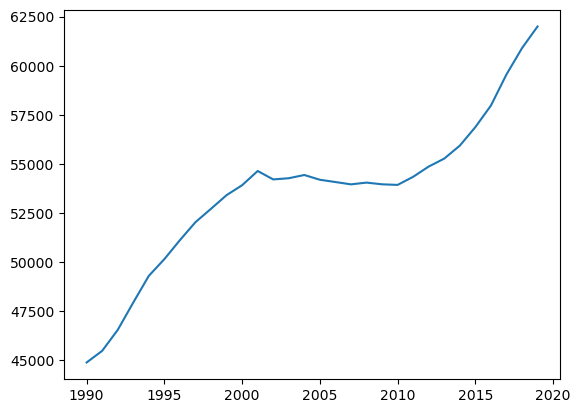

In [59]:
#graph the trend of values per continent
afg = cvd[cvd['Country/Territory'] == 'Afghanistan']


plt.plot(afg['Year'], afg['Cardiovascular Diseases'])

In [75]:
continent_year = cause_death[cause_death['Year'] == 1990].groupby('Continent').count()
continent_year

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Asia,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Europe,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
North America,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Oceania,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
South America,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [80]:
continents = cause_death.groupby('Continent').sum()
continents

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3006750,4980403,1514433,391320,4704399,17235839,821063,2006328,2588974,26549815,...,3847509,3309946,551328,4548564,5388829,5066133,5827590,9002705,730343,629656
Asia,2345265,4219232,12869210,3415678,6282625,3336930,7367483,3923023,4249165,4163590,...,15290597,15302278,1283382,4857847,20753709,76005521,19346226,33392304,1721179,2998457
Europe,2585805,115177,7067430,1571656,192892,49,497809,527724,22260,456298,...,3438743,2843738,195245,157499,2176053,8281401,4293476,8615206,337578,17765
North America,1322970,111163,1027848,239139,474983,30640,207746,1147032,138572,634961,...,2080049,1827102,39028,428027,1032116,1653501,1539711,2565897,79130,14186
Oceania,841890,26144,263324,62592,13427,42055,24460,30115,23714,73171,...,257971,141076,5714,12308,130193,493210,80094,217073,22685,3925
South America,721620,222230,1839872,380103,605649,84476,426843,2991263,184090,737366,...,2342334,2029297,36999,566900,2351578,3186656,1783360,3493729,133826,16681


Text(0, 0.5, 'Cardiovascular Diseases Cases')

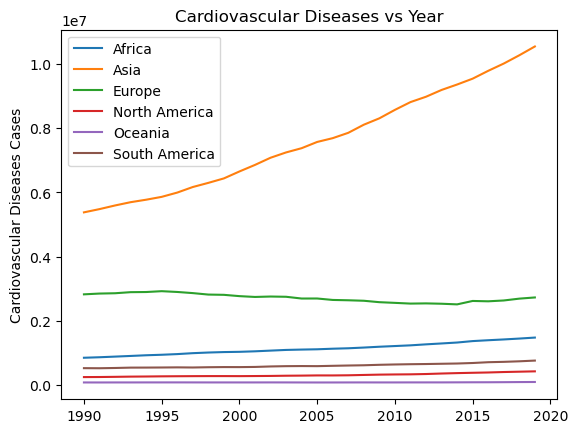

In [61]:
continent_year = cause_death[cause_death['Year'] == 1990].groupby('Continent').count()
#repeat for all the continents 
continents = cause_death.groupby('Continent').sum()

for continent in continents.index:
    cause_continent = cause_death[cause_death['Continent'] == continent]
    year_continent = cause_continent.groupby('Year').sum()
    plt.plot(year_continent.index, year_continent['Cardiovascular Diseases'])
    
    
plt.legend(continent_year.index)
plt.title('Cardiovascular Diseases vs Year')
plt.ylabel('Cardiovascular Diseases Cases')

In [62]:
#lets look deeper into which countries are causing this explosion of CVD cases in Asia


#query for Asia 
na_outlier = cause_death[cause_death['Continent'] == 'Asia']

#for each year get the country with highest value for CVD
na_1990 = na_outlier[na_outlier['Year'] == 1991]
na_1990 = na_1990.sort_values('Cardiovascular Diseases', ascending = False)
na_1990[['Country/Territory', 'Cardiovascular Diseases']].head()


,Country/Territory,Cardiovascular Diseases
1121,China,2456185
2437,India,1243951
2467,Indonesia,285751
2680,Japan,283890
4088,Pakistan,179306


In [63]:
#get the top countries with the highest values for every year!
asia = cause_death[cause_death['Continent'] == 'Asia']
asia = asia.sort_values('Cardiovascular Diseases', ascending = False)
india = asia[asia['Country/Territory'] == 'India']
china = asia[asia['Country/Territory'] == 'China']

#china is the highes



In [64]:
#get the top 5 countries for each year 
na_outlier = cause_death[cause_death['Continent'] == 'Asia']
year = 1990
top_countries = {}
for country in na_outlier:
    
    #for each year get the country with highest value for CVD
    na_1990 = na_outlier[na_outlier['Year'] == year]
    na_1990 = na_1990.sort_values('Cardiovascular Diseases', ascending = False)
    top_countries[year] = na_1990['Country/Territory'].head().tolist()
    #print(top_countries)
    year += 1

top_countries



{1990: ['China', 'India', 'Japan', 'Indonesia', 'Pakistan'],
 1991: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1992: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1993: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1994: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1995: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1996: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1997: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1998: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 1999: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2000: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2001: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2002: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2003: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2004: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2005: ['China', 'India', 'Indonesia', 'Japan', 'Pakistan'],
 2006: ['China', 'India'

In [65]:
#which country had the highest percentage of cases based on population? 



In [66]:
#are Asians more likely to get heart disease than those from other continents? -- use adjusting for percentages here



In [67]:
# for each continent what is the leading cause of death? 

continents
#this is the value thats the highest, but which row is it in? 

max_val = continents.max(axis = 'columns')
max_val
continents.idxmax(axis = 1)

Continent
Africa           Cardiovascular Diseases
Asia             Cardiovascular Diseases
Europe           Cardiovascular Diseases
North America    Cardiovascular Diseases
Oceania          Cardiovascular Diseases
South America    Cardiovascular Diseases
dtype: object

In [68]:
#what countries are given 
ctries_terr = cause_death['Country/Territory'].unique()
print(len(ctries_terr))
#print(ctries_terr)

204


In [69]:
#list of all columns 
columns = cause_death.columns
print(len(columns))
#print(columns)

36


In [70]:
years = cause_death['Year'].unique()
print(len(years))
#print(years)

30


In [71]:
#does every country have every year ? yes
cnt_terr_count = cause_death.groupby('Country/Territory').count()

#if count is less than 30 in any of the columns that means it is missing 
cnt_terr_count[(cnt_terr_count['Year'] != 30)] #no rows return so all years are there


,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,...,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Continent,Country
Country/Territory,,,,,,,,,,,,,,,,,,,,,


In [72]:
cause_death[cause_death['Year'] == 1990].groupby('Continent').count()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,50,50,50,50,50,50,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
Asia,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
Europe,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
North America,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Oceania,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
South America,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12


In [73]:
#how many continents each country has 
year_1990 = cause_death[cause_death['Year'] == 1990].groupby('Continent').sum()
year_2019 = cause_death[cause_death['Year'] == 2019].groupby('Continent').sum()

year_2019

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,100950,132586,78137,19703,97158,483713,23981,76546,84408,615498,...,187475,154675,18321,93367,197961,199323,243840,378819,25376,16335
Asia,78741,76427,785999,182372,97098,43962,164663,117048,84242,126248,...,822577,741699,41033,66715,704104,2825574,752916,1255951,55367,59274
Europe,86817,2389,335489,70607,8658,0,10717,12518,429,10996,...,126623,137692,3902,7464,45941,302334,139768,308243,8688,418
North America,44418,2483,56803,12791,12189,463,6106,52641,3871,16503,...,109543,108865,1220,11084,36658,79319,72614,119818,2602,439
Oceania,28266,715,13891,3110,466,1016,884,1471,886,4049,...,12417,7531,234,428,4599,22014,3555,9760,908,125
South America,24228,3692,105549,20403,15441,877,10576,102513,4798,27498,...,115478,105742,965,14322,80660,144870,76038,153047,3880,379


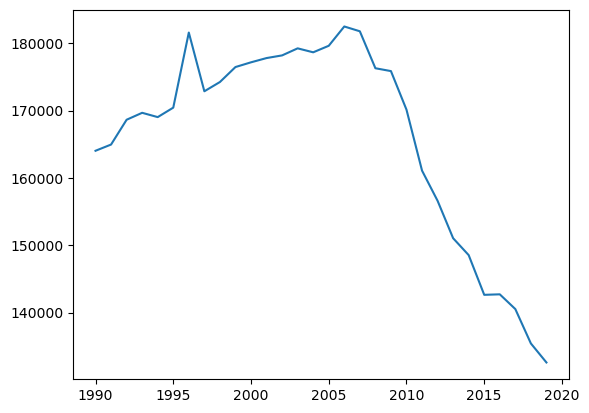

In [74]:
#i need to get all the rows in the df that have 'Africa' in them 
africa = cause_death[cause_death['Continent'] == 'Africa']
year_africa = africa.groupby('Year').sum()
year_africa.head()

plt.plot(year_africa.index, year_africa['Meningitis'])

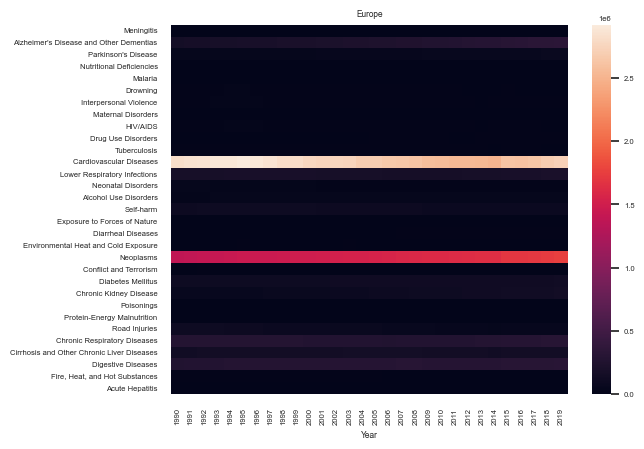

In [82]:
#create for loop instead of re-doing it everytime
def heat_map(continent):
    cont_gen = cause_death[cause_death['Continent'] == 'Europe']
    year_cont_gen = cont_gen.groupby('Year').sum()
    year_cont_gen.head()

    columns = cause_death.columns
    diseases = columns.tolist()
    diseases = diseases[2:-1]
    diseases

    color_map = cont_gen[diseases].groupby('Year').sum()
    color_map = color_map.loc[year_cont_gen.index.tolist()]
    color_map = color_map.T
    color_map

    ax = sns.heatmap(color_map)
    sns.set(font_scale=0.5)
    plt.title(continent)

    
heat_map('Europe')

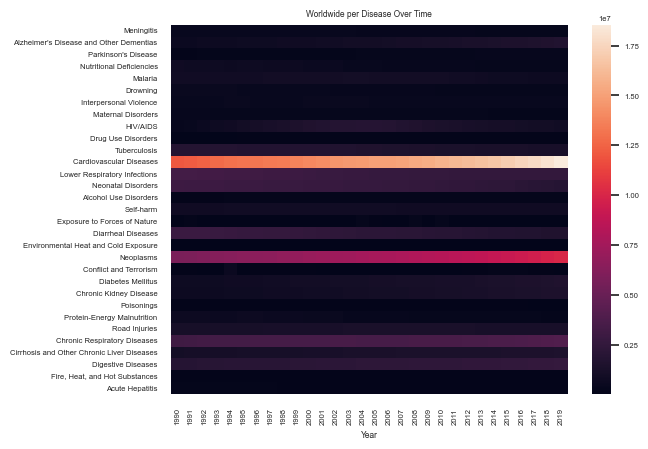

In [102]:
#heat map for all continents at once

def heat_map_all():
    year_cont_gen = cause_death.groupby('Year').sum()
    year_cont_gen
    
    columns = cause_death.columns
    diseases = columns.tolist()
    diseases = diseases[2:-1]
    diseases

    #color_map = cont_gen[diseases].groupby('Year').sum()
    #color_map = color_map.loc[year_cont_gen.index.tolist()]
    color_map = year_cont_gen.T
    color_map

    ax = sns.heatmap(color_map)
    sns.set(font_scale=0.5)
    plt.title('Worldwide per Disease Over Time')

    
heat_map_all()

In [91]:
year_cont_gen = cause_death.groupby('Year').sum()
year_cont_gen

,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,,,,,,,,,,,,,,,,,,,,,
1990,432253,560616,147156,756808,840297,460460,372497,302419,336059,56133,...,661085,600925,87951,655975,1112770,3092759,1012423,1854392,123123,166343
1991,428621,583166,150875,729145,858984,454375,383689,298271,430725,61890,...,679630,613589,87813,631013,1117024,3148288,1026870,1877515,123941,165276
1992,426440,605894,154886,700664,856415,447056,407176,299300,540070,66826,...,702253,630160,88435,606015,1125566,3207816,1042953,1903759,124995,163687
1993,420836,629571,160249,674219,862216,445434,432858,293564,664463,71603,...,728077,647255,90036,583919,1137444,3266612,1067730,1939556,127493,161899
1994,413799,652176,164381,649801,855671,443350,441971,293148,800169,76717,...,751254,665365,90897,564046,1153642,3297292,1089331,1967669,129611,159423
1995,409826,674815,168882,723095,862626,437303,444246,290551,938440,79985,...,773490,683701,90353,641084,1162799,3313295,1104380,1984263,128523,157173
1996,417259,696665,173822,671977,872476,423296,432673,287746,1061580,81704,...,799023,704624,88861,593826,1162809,3342591,1115241,1995513,126804,153406
1997,400893,717342,179347,647682,892946,413405,427316,289467,1174154,82572,...,827734,731048,87371,572372,1169798,3381872,1128962,2014659,126274,151902
1998,393364,738768,185097,620498,901338,407205,431984,289304,1303651,85087,...,854415,758681,86679,549543,1177827,3401426,1141509,2030600,124746,149563


In [ ]:
north_america = cause_death[cause_death['Continent'] == 'North America']
year_north_america = north_america.groupby('Year').sum()
year_north_america.head()


In [ ]:
#we know that 2010, Exposures to Forces of Nature had a spike - find which country/countries were causes it:
#this was the 2010 Haiti earthquake 

#query for north america 2010
na_outlier = cause_death[cause_death['Continent'] == 'North America']
na_outlier = na_outlier[na_outlier['Year'] == 2010]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Exposure to Forces of Nature', ascending = False)

na_outlier[['Country/Territory', 'Exposure to Forces of Nature']].head()

In [ ]:
#we know that 1994, Conflict and Terrorism had a spike - find which country/countries were causes it:

#query for Africa 1994
na_outlier = cause_death[cause_death['Continent'] == 'Africa']
na_outlier = na_outlier[na_outlier['Year'] == 1994]

#sort by value of outlier var 
na_outlier = na_outlier.sort_values('Conflict and Terrorism', ascending = False)

na_outlier[['Country/Territory', 'Conflict and Terrorism']].head()

In [25]:
cause_death[cause_death['Continent'] == 'Africa'].sort_values('HIV/AIDS')['HIV/AIDS']

1170         0
4708         0
4707         0
4706         0
4705         0
         ...  
5028    282664
5024    286607
5027    298253
5025    301614
5026    305491
Name: HIV/AIDS, Length: 1500, dtype: int64

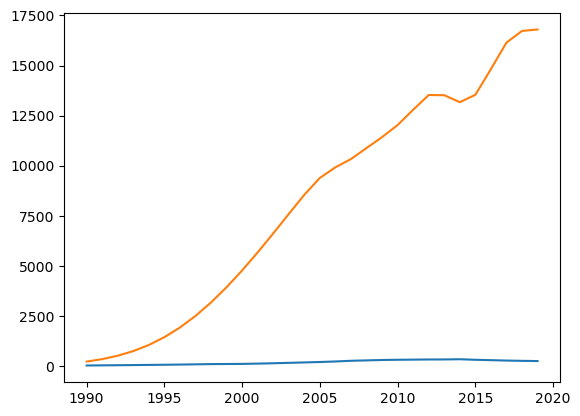

In [26]:
#africa analysis
africa = cause_death[cause_death['Continent'] == 'Africa']

algeria = africa[africa['Country/Territory'] == 'Algeria']
angola = africa[africa['Country/Territory'] == 'Angola']

plt.plot(africa['Year'][:30], algeria['HIV/AIDS'])
plt.plot(africa['Year'][:30], angola['HIV/AIDS'])


In [27]:
africa['Country/Territory'].unique().tolist()

['Algeria',
 'Angola',
 'Benin',
 'Botswana',
 'Burundi',
 'Cameroon',
 'Cape Verde',
 'Central African Republic',
 'Chad',
 'Comoros',
 'Congo',
 'Djibouti',
 'Egypt',
 'Equatorial Guinea',
 'Eritrea',
 'Ethiopia',
 'Gabon',
 'Gambia',
 'Ghana',
 'Guinea',
 'Guinea-Bissau',
 'Kenya',
 'Lesotho',
 'Liberia',
 'Libya',
 'Madagascar',
 'Malawi',
 'Mali',
 'Mauritania',
 'Mauritius',
 'Morocco',
 'Mozambique',
 'Namibia',
 'Niger',
 'Nigeria',
 'Rwanda',
 'Sao Tome and Principe',
 'Senegal',
 'Seychelles',
 'Sierra Leone',
 'Somalia',
 'South Africa',
 'South Sudan',
 'Sudan',
 'Tanzania',
 'Togo',
 'Tunisia',
 'Uganda',
 'Zambia',
 'Zimbabwe']

Text(0.5, 1.0, 'African Countries HIV/AIDS number of deaths')

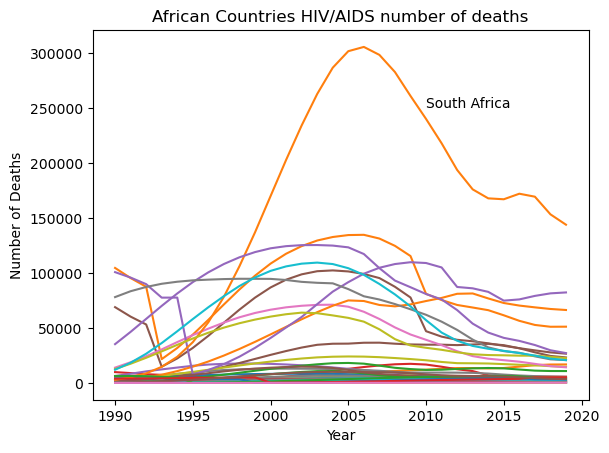

In [34]:
for country in africa['Country/Territory'].unique().tolist():
    #print(country)
    plt.plot(africa['Year'][:30], africa[africa['Country/Territory'] == country]['HIV/AIDS'])
plt.text(2010, 250000, s = 'South Africa')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('African Countries HIV/AIDS number of deaths')

In [29]:
#find the country that has huge increase and label it 

africa.sort_values('HIV/AIDS', ascending = False)[['Country/Territory', 'HIV/AIDS', 'Year']]


,Country/Territory,HIV/AIDS,Year
5026,South Africa,305491,2006
5025,South Africa,301614,2005
5027,South Africa,298253,2007
5024,South Africa,286607,2004
5028,South Africa,282664,2008
...,...,...,...
4707,Sao Tome and Principe,0,2017
4706,Sao Tome and Principe,0,2016
4705,Sao Tome and Principe,0,2015
4704,Sao Tome and Principe,0,2014


In [30]:
africa[africa['Country/Territory'] == 'Angola']['HIV/AIDS']

150      239
151      361
152      531
153      762
154     1067
155     1456
156     1937
157     2514
158     3186
159     3947
160     4784
161     5685
162     6630
163     7600
164     8557
165     9398
166     9927
167    10340
168    10889
169    11433
170    12036
171    12798
172    13533
173    13524
174    13176
175    13544
176    14825
177    16149
178    16728
179    16802
Name: HIV/AIDS, dtype: int64

In [31]:
africa[africa['Country/Territory'] == 'Angola']['HIV/AIDS']

150      239
151      361
152      531
153      762
154     1067
155     1456
156     1937
157     2514
158     3186
159     3947
160     4784
161     5685
162     6630
163     7600
164     8557
165     9398
166     9927
167    10340
168    10889
169    11433
170    12036
171    12798
172    13533
173    13524
174    13176
175    13544
176    14825
177    16149
178    16728
179    16802
Name: HIV/AIDS, dtype: int64